In [1]:
import arrow
print 'Last update: %s ' % arrow.now().format('YYYY-MM-DD')

Last update: 2019-07-28 


# Signal processing
This notebook want to present the basic signal processing properties of a signal

In [2]:
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# Functions

In [3]:
def compute_signal(A, f, t, phi):
    """
    Compute a sin wave signal

    Parameters
    ----------
    A: float/int
        Amplitud
    f: float/int
        frequency
    t: np.array
        time intervals
    phi: float/int
        phase of the signal

    Returns
    -------
    np.array
    """
    return A * np.sin(2 * np.pi * f * t + phi)


def compute_time_axis(fs, max_time=2):
    """
    Compute time axis of a sampled signal
    
    Parameters
    ----------
    fs: float/int
        sampling frequency
    max_time: int
        max time of the signal

    Returns
    -------
    np.array:
        timestamps of the sampled signal
    """
    ts = 1 / float(fs)
    return np.arange(0, max_time, ts)


def plot_sampled_signals(frequencies, plot_analog_signal=True, plot_reconstruction=False):
    """
    Plot analog signal / samples / reconstructed signal
    
    Parameters
    ----------
    frequencies: list
        Values at which sample the original signal
    plot_analog_signal: Bool
        Bool to add analog signal to plot
    plot_reconstruction: Bool
        Bool to add reconstructed signal to the plot
    """
    # compute number of rows
    num_rows = max(1,len(frequencies)/2 + -len(frequencies)%2)
    
    # create figure
    fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 5 * num_rows))
    
    # create list of letters
    letters = list(string.ascii_lowercase)[:len(frequencies)]

    for i, (letter, f) in enumerate(zip(letters, frequencies)):
        # create sampling period
        ts = compute_time_axis(f)

        # create sampled signal
        s = compute_signal(A=1, f=2, t=ts, phi=np.pi / 2)
        
        # plot signal x(t)
        if len(axs.shape)==2:
            ax = axs[i / 2, i % 2]
        else:
            ax = axs[i % 2]
        
        if plot_analog_signal:
            ax.plot(t, analog_signal)
        
        ax.plot(ts, s, 'ko')
        
        if plot_reconstruction:
            ax.plot(ts, s, 'r')
        
        # Add info to axis
        ax.set_title('%s) Analog signal $x(t)$ sampled at %d Hz' % (letter, f))
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Amplitud')

    plt.tight_layout()

# Create an analog signal
Initialy an analog signal $x(t)$ is created. This signal follow the expression:

$$x(t) = A · sin(2·\pi·f·t + \phi )$$

For the next example the following values are set:
 * $A$ = 1
 * $f$ = 2 Hz
 * $\phi$ = 0


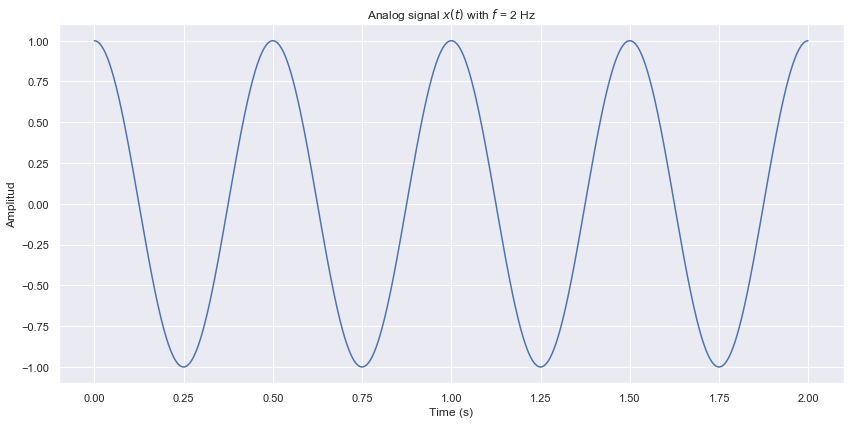

In [4]:
# create time axis
t = np.arange(0, 2, 1e-3)

freq =2
# create analog signal x(t)
analog_signal = compute_signal(A=1, f=freq, t=t, phi=np.pi / 2)

# plot signal x(t)
plt.figure(figsize=(12, 6))
plt.plot(t, analog_signal)
plt.title('Analog signal $x(t)$ with $f$ = %d Hz' % freq)
plt.xlabel('Time (s)')
plt.ylabel('Amplitud')
plt.tight_layout()


# Sampling analog signal
Our digital signal $x(n)$ can be written as a function of our analog signal $x(t)$. 
 
$$x(n)=x(t) \sum_{n=-\infty}^{\infty}{\delta(t-nT)}$$

This expression is the product between our analog signal $x(t)$ and $\delta$ train. 

![](img/signal_sampling.png)

Therefore our final signal will be the points only where the signal is sampled or as a expression:
$$x(n)=x(t-nT)$$

We can have sampling at different frequencies as presented below.

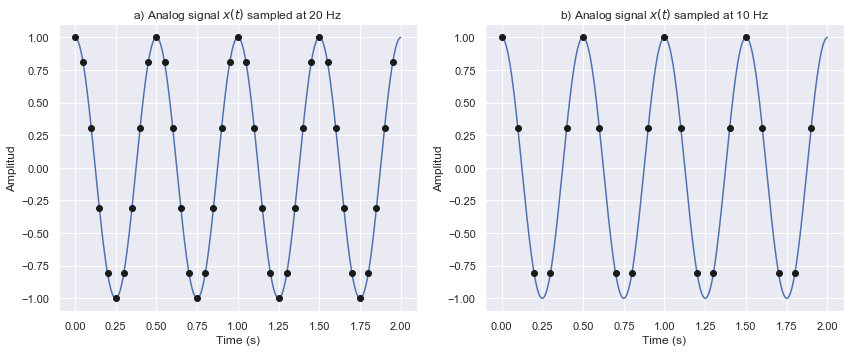

In [5]:
plot_sampled_signals([20, 10])

From the previous sampled data we can obtain try to reconstruc the original samples by interpolating the values

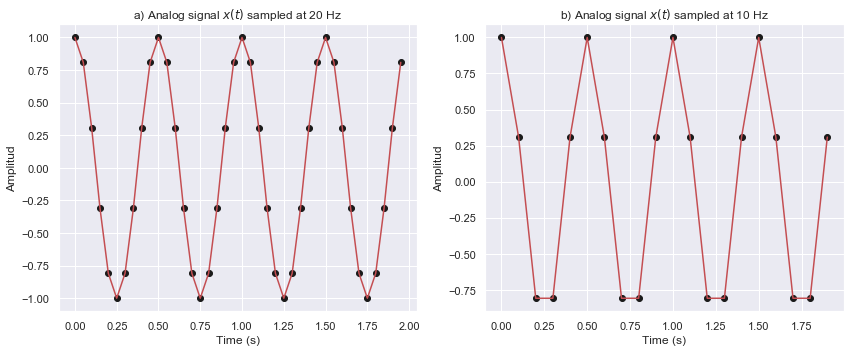

In [6]:
plot_sampled_signals([20, 10], plot_analog_signal=False, plot_reconstruction=True)


From the previous images we can see that using te samples and some interpolation methods we are able to reconstruct the original signal.Adding a LPF after the signal reconstruction will help by removing the introduced high frequencies components.

# Nyquist frequency

Signal processing (and other fields) rely on sampling a continuous-time signal in order to obtain a dis-
crete-time representation of the signal. Sampling theory has a long history and finds its roots in the work of Cauchy [1] and Gauss. Its name has almost become synonymous with that of C. E. Shannon, who, amongst others, is credited with the statement of the uniform sampling theorem [2]. The Shannon–Whittaker theory states that from uniformly spaced samples, one may reconstruct a signal. However, this is true only under certain conditions.

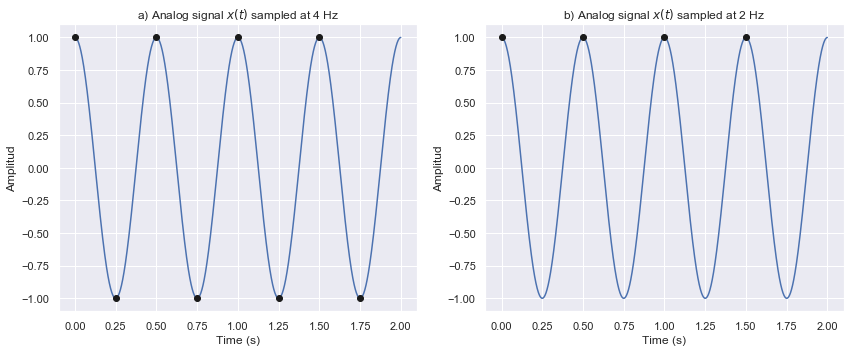

In [7]:
plot_sampled_signals([4, 2])

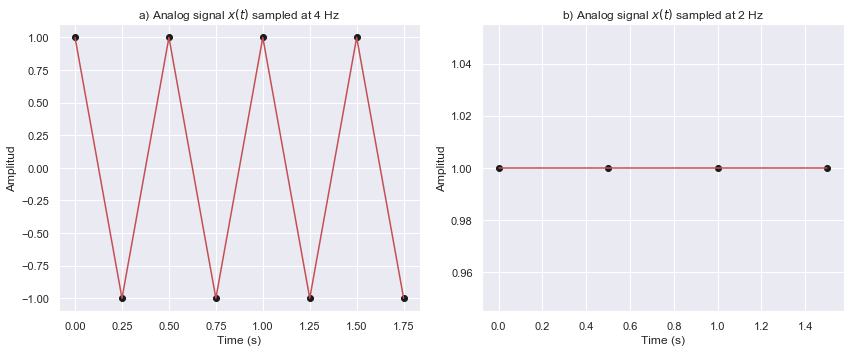

In [8]:
plot_sampled_signals([4, 2], plot_analog_signal=False, plot_reconstruction=True)

From the previous examples we can see that example a signal at 2 Hz sampled at 4 Hz is the limit that we can sample. As we are only sampling on the min/max values.
On the other hand, on example b, signal at 2 Hz sampled at 2 Hz show that with the obtained signal we can not reconstruct the original signal. This si because there is a ratio between the sampling rate and the max frequency of the signal that needs to be respected. This is the Nyquist frequency and can be defined as follows:

$$f_{max} = \frac{F_s}{2}$$

The Shannon–Whittaker theory states that one may reconstruct a signal that contains no frequencies above half the
sampling rate (a limit to which Nyquist’s name has become attached). The importance and attraction of this theorem is that the samples of a bandlimited signal at an appropriate rate contain all information needed to reconstruct the signal.

# REFERENCES

[1] A. Cauchy, “Mémoire sur diverses formules d’analyse,” C. R. Acad. Sci., vol. 12, pp. 283–298, 1841.

[2] C. E. Shannon, “Communication in the presence of noise,” Proc. IRE, vol. 37, pp. 10–21, Jan. 1949.